In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

baseball_data = pd.read_csv("baseball.csv")
del baseball_data["Team"]
del baseball_data["Lg"]
baseball_data.head()

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
0,1,2022,78,118,133,78,55,0.586,23,5097,...,0.762,118,1954,91,68,4,41,9,940,5.0
1,2,2022,91,115,132,91,41,0.689,29,5101,...,0.786,115,2026,75,46,1,45,16,942,5.4
2,3,2022,72,113,131,72,59,0.550,20,4964,...,0.749,113,1903,104,46,8,27,11,896,4.6
3,4,2022,79,111,133,79,54,0.594,22,5064,...,0.744,111,1879,95,59,12,33,27,894,4.9
4,5,2022,67,110,131,67,64,0.511,27,4931,...,0.727,110,1800,100,45,10,36,8,899,4.4


In [2]:
baseball_data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,2022.0,66.266667,100.066667,132.533333,66.266667,66.266667,0.499900,27.733333,4971.433333,...,0.706967,100.066667,1763.400000,91.866667,55.433333,10.333333,33.700000,12.466667,891.800000,4.310000
std,8.803408,0.0,12.173837,10.184279,1.105888,12.173837,12.117054,0.091293,5.037332,93.600650,...,0.038712,10.184279,138.228846,13.174514,12.667317,6.104455,6.374248,5.829375,43.282074,0.481628
min,1.000000,2022.0,46.000000,81.000000,130.000000,46.000000,41.000000,0.346000,20.000000,4786.000000,...,0.621000,81.000000,1475.000000,66.000000,36.000000,0.000000,21.000000,4.000000,805.000000,3.300000
10%,3.900000,2022.0,50.800000,83.900000,131.000000,50.800000,50.800000,0.381800,22.000000,4840.500000,...,0.653200,83.900000,1585.100000,75.000000,43.800000,3.900000,26.900000,6.000000,833.600000,3.590000
25%,8.250000,2022.0,56.000000,95.250000,132.000000,56.000000,58.250000,0.421000,23.000000,4925.250000,...,0.690000,95.250000,1684.250000,80.750000,46.000000,6.250000,28.000000,8.250000,861.000000,4.125000
50%,15.500000,2022.0,67.000000,101.000000,133.000000,67.000000,65.000000,0.507500,27.000000,4971.000000,...,0.704500,101.000000,1748.000000,92.500000,52.500000,10.000000,34.500000,11.000000,897.500000,4.400000
75%,22.750000,2022.0,74.000000,108.500000,133.000000,74.000000,77.000000,0.561000,32.000000,5036.500000,...,0.734000,108.500000,1856.500000,99.750000,64.000000,14.000000,37.750000,15.750000,921.250000,4.575000
90%,27.100000,2022.0,83.200000,111.200000,134.000000,83.200000,82.100000,0.620500,35.000000,5097.400000,...,0.750300,111.200000,1911.700000,107.500000,71.500000,18.100000,43.000000,20.100000,942.000000,4.900000
max,30.000000,2022.0,91.000000,118.000000,134.000000,91.000000,87.000000,0.689000,36.000000,5125.000000,...,0.786000,118.000000,2033.000000,119.000000,88.000000,27.000000,45.000000,27.000000,978.000000,5.400000


In [3]:
baseball_data.columns

Index(['Rk', 'Season', 'W', 'OPS+▼', 'GP', 'W.1', 'L', 'WL%', 'Bat#', 'PA',
       'AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GIDP', 'HBP', 'SH', 'SF',
       'IBB', 'LOB', 'R/Gm'],
      dtype='object')

<AxesSubplot: ylabel='Density'>

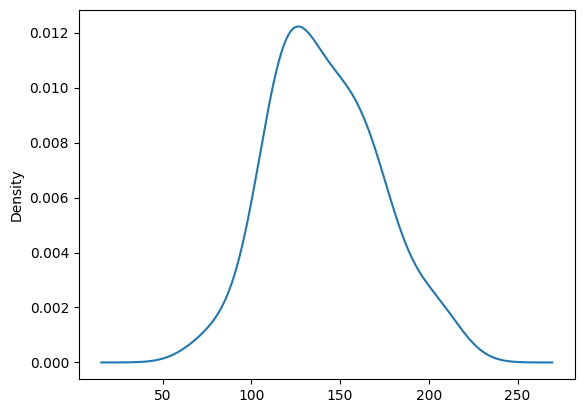

In [40]:
baseball_data["HR"].plot.density()

In [5]:
baseball_data.corr()

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
Rk,1.000000,NaN,-0.845247,-0.980372,-0.024794,-0.845247,0.846945,-0.847494,0.367800,-0.687119,...,-0.882170,-0.980372,-0.837356,0.013974,-0.081479,0.400395,-0.295882,-0.370238,-0.522631,-0.846217
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W,-0.845247,NaN,1.000000,0.829228,0.096647,1.000000,-0.995866,0.998966,-0.173116,0.666473,...,0.790769,0.829228,0.755255,-0.247022,0.207852,-0.358061,0.405444,0.468057,0.505198,0.817599
OPS+▼,-0.980372,NaN,0.829228,1.000000,0.051845,0.829228,-0.828383,0.830486,-0.350508,0.755782,...,0.905524,1.000000,0.858423,-0.014838,0.102409,-0.333164,0.373208,0.386872,0.613184,0.874401
GP,-0.024794,NaN,0.096647,0.051845,1.000000,0.096647,-0.005833,0.052121,-0.029299,0.462738,...,0.019761,0.051845,0.158489,0.064218,-0.044144,0.177074,0.062614,0.190066,0.273181,-0.023307
W.1,-0.845247,NaN,1.000000,0.829228,0.096647,1.000000,-0.995866,0.998966,-0.173116,0.666473,...,0.790769,0.829228,0.755255,-0.247022,0.207852,-0.358061,0.405444,0.468057,0.505198,0.817599
L,0.846945,NaN,-0.995866,-0.828383,-0.005833,-0.995866,1.000000,-0.998891,0.171253,-0.627364,...,-0.792671,-0.828383,-0.744329,0.254040,-0.212855,0.375900,-0.401629,-0.452904,-0.482633,-0.823557
WL%,-0.847494,NaN,0.998966,0.830486,0.052121,0.998966,-0.998891,1.000000,-0.174171,0.648180,...,0.792205,0.830486,0.750518,-0.250159,0.207454,-0.366860,0.404610,0.460721,0.495924,0.820818
Bat#,0.367800,NaN,-0.173116,-0.350508,-0.029299,-0.173116,0.171253,-0.174171,1.000000,-0.203207,...,-0.291820,-0.350508,-0.330404,-0.243726,0.299635,0.370804,-0.001503,-0.097780,-0.145601,-0.214903
PA,-0.687119,NaN,0.666473,0.755782,0.462738,0.666473,-0.627364,0.648180,-0.203207,1.000000,...,0.781461,0.755782,0.794137,0.104296,0.239654,-0.184630,0.494608,0.513540,0.851156,0.777128


<AxesSubplot: >

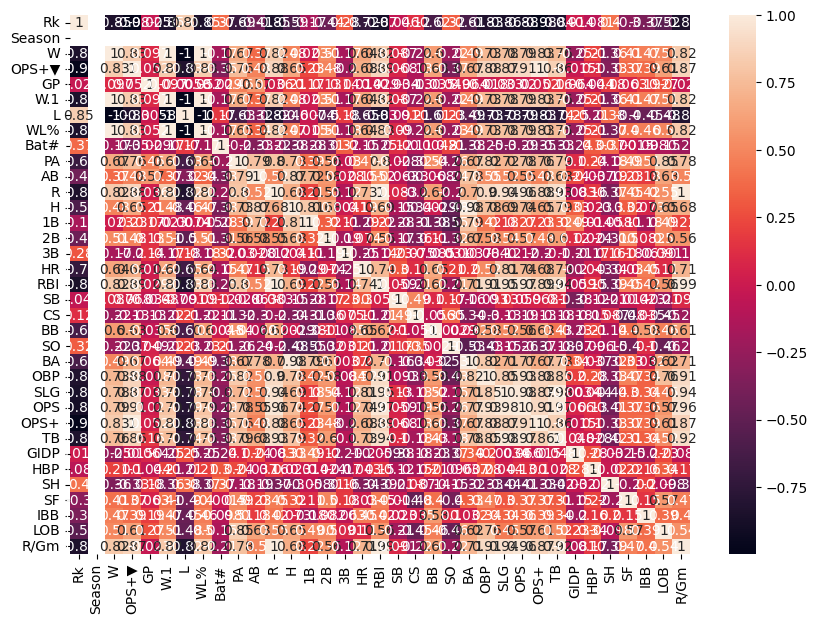

In [6]:
plt.figure(figsize = (10, 7))
sns.heatmap(baseball_data.corr(),annot = True)

In [7]:
l_column = list(baseball_data.columns)
len_feature = len(l_column)
l_column

['Rk',
 'Season',
 'W',
 'OPS+▼',
 'GP',
 'W.1',
 'L',
 'WL%',
 'Bat#',
 'PA',
 'AB',
 'R',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'GIDP',
 'HBP',
 'SH',
 'SF',
 'IBB',
 'LOB',
 'R/Gm']

In [31]:
X = baseball_data[l_column[0:len_feature-2]]
y = baseball_data[l_column[len_feature-19]]
X

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OBP,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB
0,1,2022,78,118,133,78,55,0.586,23,5097,...,0.331,0.431,0.762,118,1954,91,68,4,41,9
1,2,2022,91,115,132,91,41,0.689,29,5101,...,0.337,0.449,0.786,115,2026,75,46,1,45,16
2,3,2022,72,113,131,72,59,0.550,20,4964,...,0.324,0.425,0.749,113,1903,104,46,8,27,11
3,4,2022,79,111,133,79,54,0.594,22,5064,...,0.322,0.422,0.744,111,1879,95,59,12,33,27
4,5,2022,67,110,131,67,64,0.511,27,4931,...,0.319,0.408,0.727,110,1800,100,45,10,36,8
5,6,2022,83,109,134,83,51,0.619,24,5041,...,0.318,0.445,0.763,109,2033,83,54,0,28,10
6,7,2022,85,109,133,85,48,0.639,23,4978,...,0.318,0.419,0.737,109,1861,94,48,6,36,14
7,8,2022,85,109,134,85,49,0.634,35,5078,...,0.327,0.407,0.735,109,1843,95,88,18,37,20
8,9,2022,73,107,133,73,60,0.549,30,5000,...,0.317,0.421,0.738,107,1907,96,44,5,33,11
9,10,2022,75,105,133,75,58,0.564,36,5023,...,0.313,0.387,0.700,105,1711,90,69,9,36,15


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4)

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
Coef = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
Coef

,Coefficients
Rk,0.020809
Season,0.001403
W,-0.003317
OPS+▼,0.017437
GP,0.014368
W.1,0.001467
L,0.000476
WL%,0.001796
Bat#,0.002128
PA,0.012815


In [33]:
predictions = lm.predict(X_test)
print ("Size of the predicted object:", predictions.shape)

Size of the predicted object: (8,)


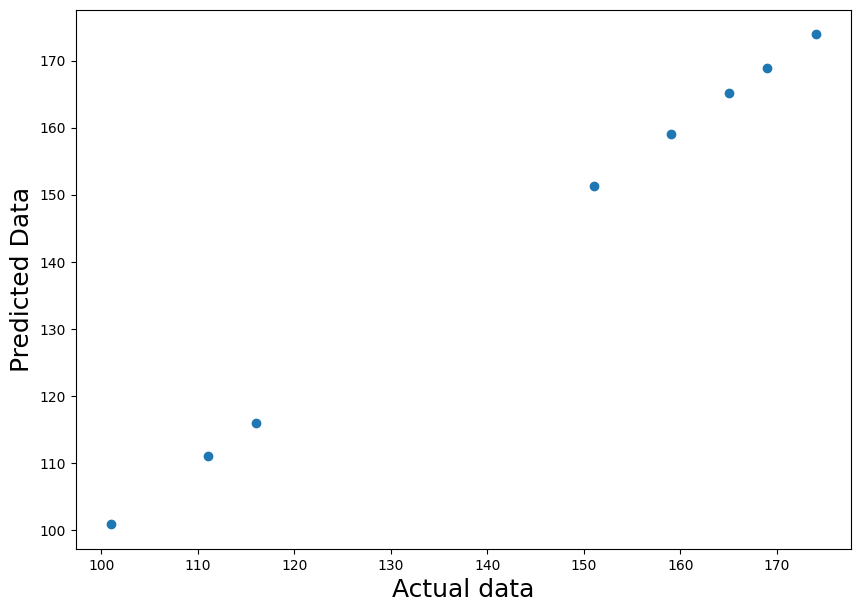

In [35]:
plt.figure(figsize=(10,7))
plt.xlabel("Actual data",fontsize=18)
plt.ylabel("Predicted Data", fontsize=18)
plt.scatter(x=y_test,y=predictions)

C:\Users\gener\AppData\Local\Temp\ipykernel_65716\928403460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<AxesSubplot: ylabel='Density'>

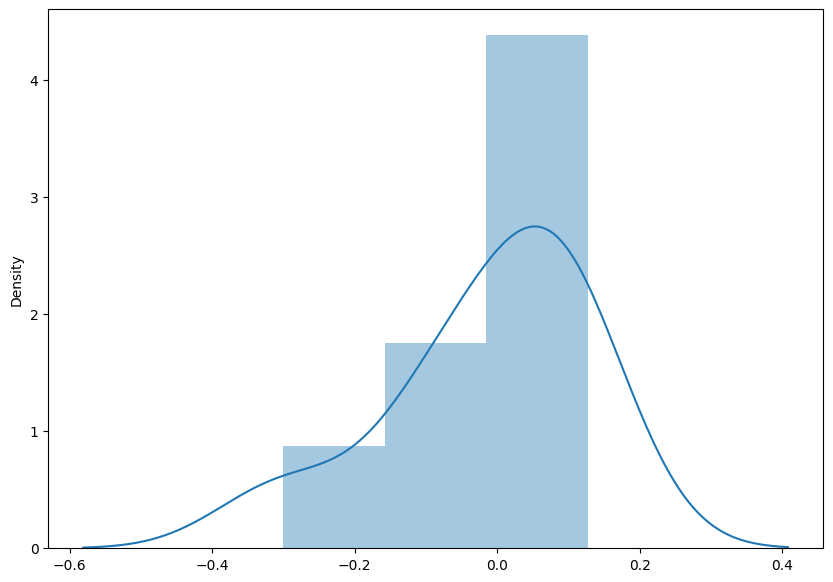

In [36]:
plt.figure(figsize=(10,7))
sns.distplot([y_test-predictions])

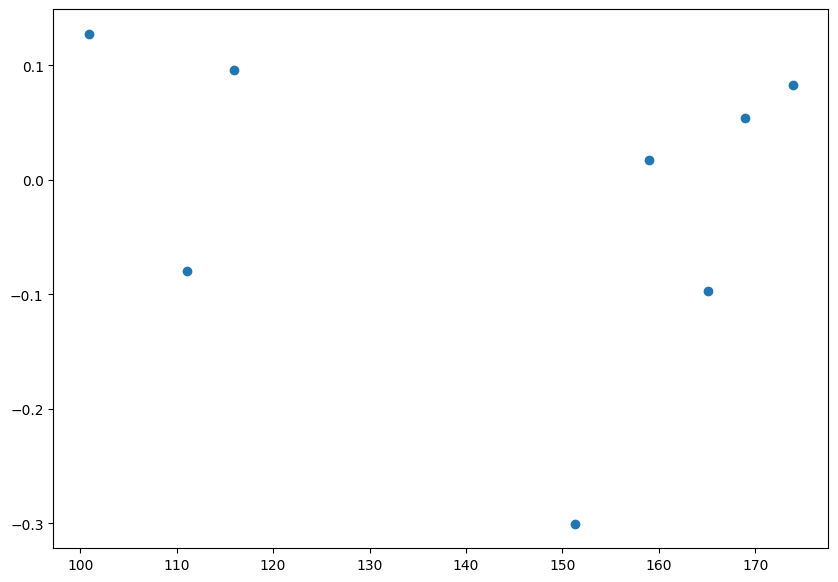

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(x=predictions,y=y_test-predictions)

In [38]:
print("Mean absolute error:", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error:", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean absolute error: 0.10688579663731801
Mean square error: 0.01770085133361711
Root mean square error: 0.13304454642568822


In [39]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 1.0
